In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
# Grafo (distâncias)
graph = {
    'A': {'A': 0, 'B': 2, 'C': 10, 'D': 8, 'E': 3},
    'B': {'A': 1, 'B': 0, 'C': 2, 'D': 5, 'E': 7},
    'C': {'A': 9, 'B': 1, 'C': 0, 'D': 3, 'E': 6},
    'D': {'A': 10, 'B': 4, 'C': 3, 'D': 0, 'E': 2},
    'E': {'A': 2, 'B': 7, 'C': 5, 'D': 1, 'E': 0}
}

# Parâmetros
alpha = 1
beta = 1
rho = 0.5
initial_pheromone = 2

In [4]:
# Inicialização de feromônio
pheromones = {i: {j: initial_pheromone for j in graph[i]} for i in graph}

def plot_graph(path=None):
    G = nx.Graph()
    for i in graph:
        for j in graph[i]:
            G.add_edge(i, j, weight=pheromones[i][j])  # Mostrando o feromônio em vez da distância
    
    pos = nx.spring_layout(G)
    edge_labels = {(i, j): '{:.2f}'.format(G[i][j]['weight']) for i, j in G.edges()}
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    plt.show()


def calculate_probability(k, available_nodes):
    total = sum([(pheromones[k][j]**alpha * (1.0 / graph[k][j])**beta) for j in available_nodes])
    probs = [(pheromones[k][j]**alpha * (1.0 / graph[k][j])**beta) / total for j in available_nodes]
    return probs

def aco_simulation(start):
    path = [start]
    available_nodes = list(graph.keys())
    available_nodes.remove(start)
    
    current_node = start
    while available_nodes:
        next_node_probs = calculate_probability(current_node, available_nodes)
        next_node = np.random.choice(available_nodes, 1, p=next_node_probs)[0]
        path.append(next_node)
        available_nodes.remove(next_node)
        current_node = next_node
    
    return path

# Atualização de feromônio
def update_pheromones(path):
    for i in range(len(path)-1):
        k, j = path[i], path[i+1]
        pheromones[k][j] = (1 - rho) * pheromones[k][j] + (1 / graph[k][j])
        pheromones[j][k] = (1 - rho) * pheromones[j][k] + (1 / graph[j][k])




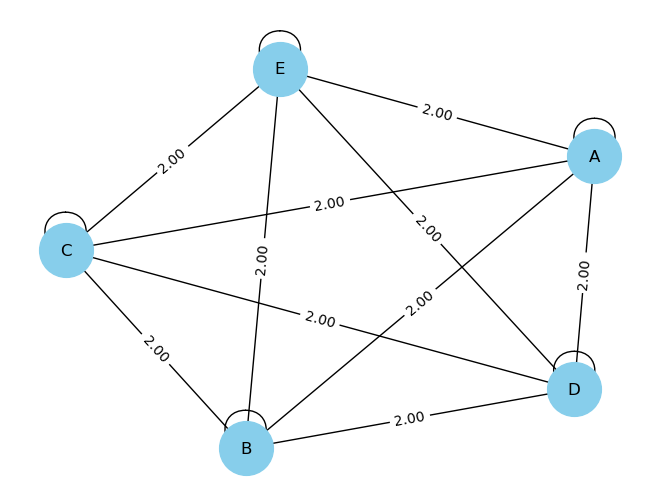

Simulação partindo de B: Rota = ['B', 'A', 'D', 'C', 'E']


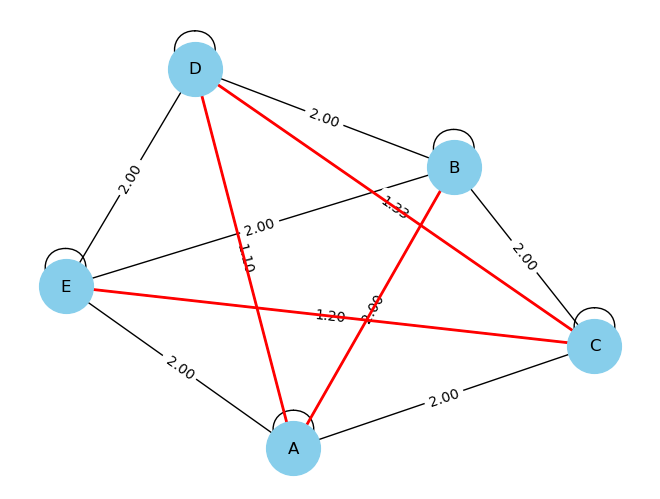

Simulação partindo de C: Rota = ['C', 'B', 'A', 'E', 'D']


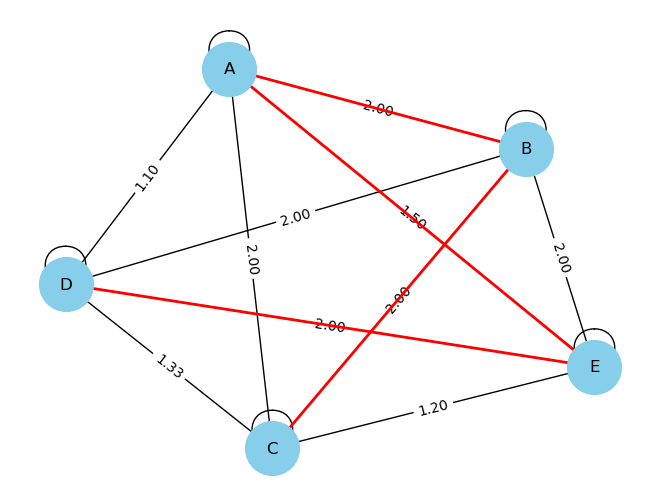

Simulação partindo de D: Rota = ['D', 'B', 'A', 'E', 'C']


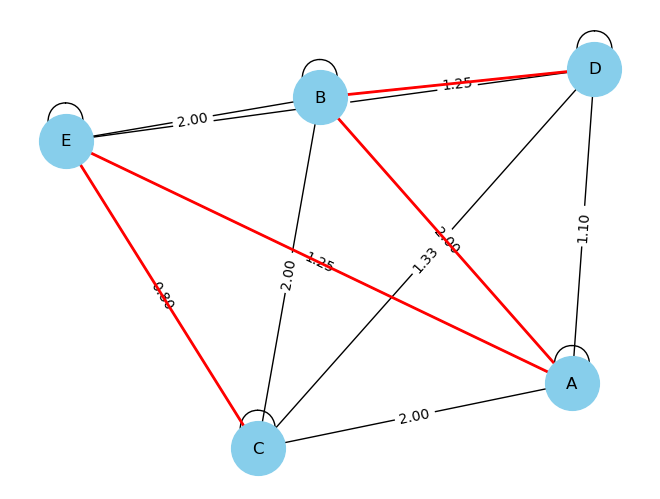

Simulação partindo de E: Rota = ['E', 'B', 'A', 'D', 'C']


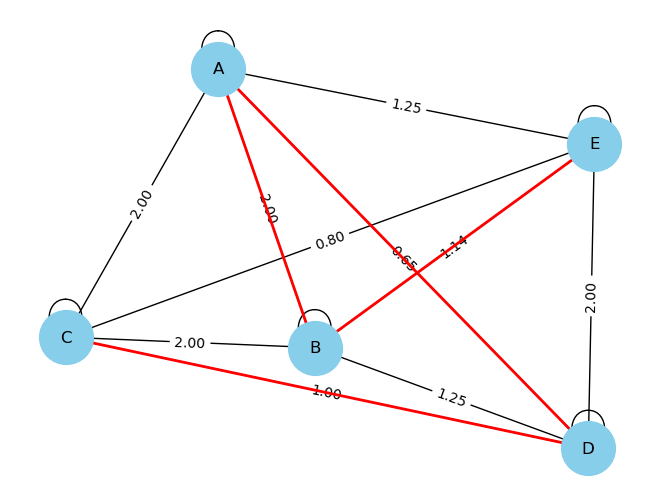

In [5]:
# Executando a simulação e plotando
plot_graph()
for start_node in ['B', 'C', 'D', 'E']:
    path = aco_simulation(start_node)
    print(f"Simulação partindo de {start_node}: Rota = {path}")
    update_pheromones(path)
    plot_graph(path)
